# Time Evolution

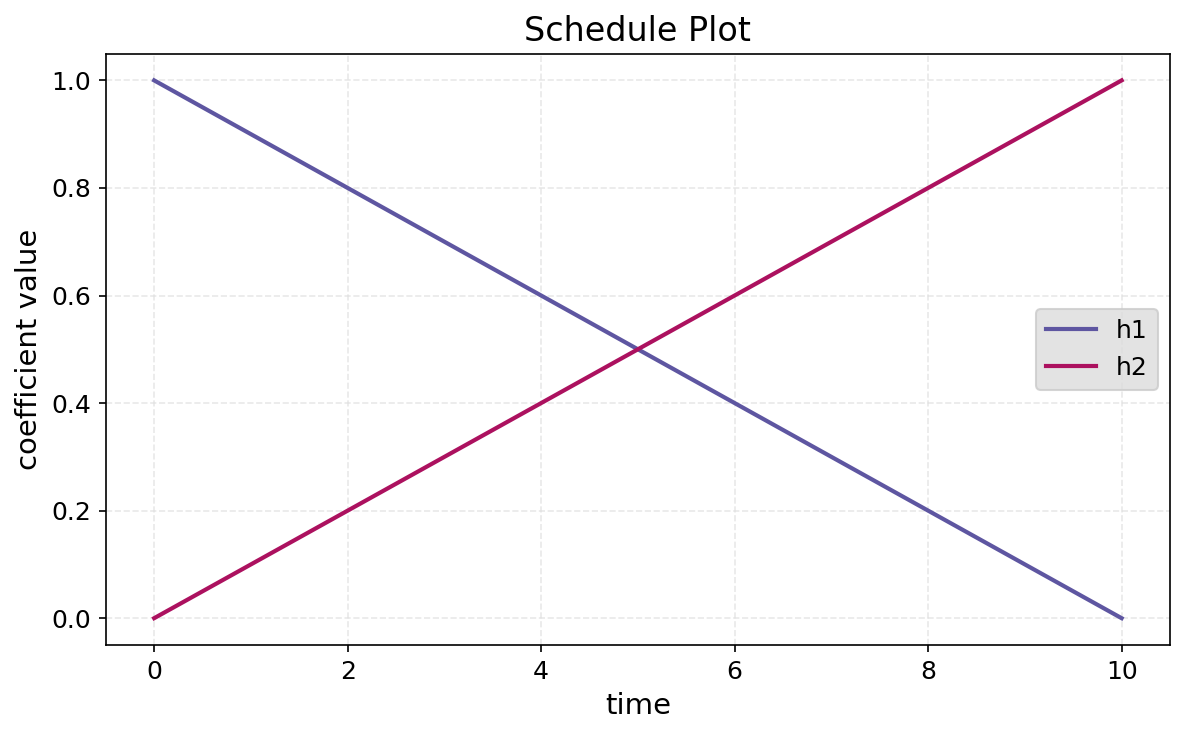

Time Evolution Results:
Final Expectation Values: [ 0.99453274 -0.03132965  0.09961467]
Final State: QTensor(shape=2x1, nnz=2, format='csr')
[[-0.29959942-9.52631386e-01j]
 [ 0.05228413+5.54773190e-07j]]


In [6]:
import numpy as np

from qilisdk.analog import Schedule, X, Y, Z
from qilisdk.backends import QutipBackend
from qilisdk.core import ket, tensor_prod
from qilisdk.functionals import TimeEvolution

T = 10  # Total evolution time
dt = 0.1  # Time-step
steps = np.linspace(0, T, int(T / dt))
nqubits = 1

# Define two Hamiltonians for the simulation
H1 = sum(X(i) for i in range(nqubits))
H2 = sum(Z(i) for i in range(nqubits))

# Create a schedule for the time evolution
schedule = Schedule(
    total_time=T,
    dt=dt,
    hamiltonians={"h1": H1, "h2": H2},
    coefficients={"h1": {(0, T): lambda t: 1 - t / T}, "h2": {(0, T): lambda t: t / T}},
)

schedule.draw()

# Prepare an initial state (equal superposition)
state = tensor_prod([(ket(0) + ket(1)).unit() for _ in range(nqubits)]).unit()

# Perform time evolution on the CUDA backend with observables to monitor
time_evolution = TimeEvolution(
    schedule=schedule, initial_state=state, observables=[Z(0), X(0), Y(0)], store_intermediate_results=True
)

backend = QutipBackend()
results = backend.execute(time_evolution)
print("Time Evolution Results:")
print("Final Expectation Values:", results.final_expected_values)
print("Final State:", results.final_state)